<br>Attributes</br>
<br><br>ID: unique ID of representative</br>
<br>Loan Amount: loan amount applied</br>
<br>Funded Amount:loan amount funded</br>
<br>Funded Amount Investor: loan amount approved by the investors</br>
<br>Term: term of loan (in months)</br>
<br>Batch Enrolled: batch numbers to representatives</br>
<br>Interest Rate: interest rate (%) on loan</br>
<br>Grade: grade by the bank</br>
<br>Sub Grade: sub-grade by the bank</br>
<br>Employment Duration: duration</br>
<br>Home Ownership: Owner ship of home</br>
<br>Verification Status: Income verification by the bank</br>
<br>Payment Plan: if any payment plan has started against loan</br>
<br>Loan Title: loan title provided</br>
<br>Debit to Income: ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage</br>
<br>Delinquency - two years: number of 30+ days delinquency in past 2 years</br>
<br>Inquires - six months: total number of inquiries in last 6 months</br>
<br>Open Account: number of open credit line in representative's credit line</br>
<br>Public Record: number of derogatory public records</br>
<br>Revolving Balance: total credit revolving balance</br>
<br>Revolving Utilities: amount of credit a representative is using relative to revolving_balance</br>
<br>Total Accounts: total number of credit lines available in representatives credit line</br>
<br>Initial List Status: unique listing status of the loan - W(Waiting), F(Forwarded)</br>
<br>Total Received Interest: total interest received till date</br>
<br>Total Received Late Fee: total late fee received till date</br>
<br>Recoveries: post charge off gross recovery</br>
<br>Collection Recovery Fee: post charge off collection fee</br>
<br>Collection 12 months Medical: total collections in last 12 months excluding medical collections</br>
<br>Application Type: indicates when the representative is an individual or joint</br>
<br>Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled</br>
<br>Accounts Delinquent: number of accounts on which the representative is delinquent</br>
<br>Total Collection Amount: total collection amount ever owed</br>
<br>Total Current Balance: total current balance from all accounts</br>
<br>Total Revolving Credit Limit: total revolving credit limit</br>
<br>Loan Status: 1 = Defaulter, 0 = Non Defaulters </br>

In [276]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline, make_union, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
current_palette = sns.color_palette('colorblind')

In [36]:
def check_path(path):
    '''
    This function sets the current path of the working Directory
    '''
    if os.getcwd() == path:
        print("Current Directory is ",path)
        return
    elif os.path.exists(path):
        os.chdir('C:/Users/shuklas/Downloads/Participants_Data_PLD')
    else :
        os.mkdirs('C:/Users/shuklas/Downloads/Participants_Data_PLD')
    print("Current Directory Changed to :-")
    return os.getcwd()

In [37]:
check_path('C:\\Users\\shuklas\\Downloads\\Participants_Data_PLD')

Current Directory is  C:\Users\shuklas\Downloads\Participants_Data_PLD


In [63]:
# Read the Data from the training data set and display the fist 5 rows
train = pd.read_csv("train.csv")
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [64]:
# Display the Columns
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

### EDA : To visually analyse the data before proceeding with Preprocessing

In [65]:
# Check for any missing Values :-
train.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

No missing values, no need for imputation

In [220]:
train.columns = train.columns.map(str.lower)
train['loan status'].value_counts(normalize = True)*100

0    90.749003
1     9.250997
Name: loan status, dtype: float64

In [219]:
train['loan status'].value_counts()

0    61222
1     6241
Name: loan status, dtype: int64

###### This is a highly implanced dataset. Even if we predict, no one is going to default, we would still get an accuracy of 90%. The Balancing Techniques would be discussed in the Modelling Section

In [86]:
'''
Check for duplicate IDs; If Duplicate IDs are found, check for whether they are duplicates 
or have different loans under their name
'''
if train.shape[0] == len(pd.unique(train['id'])):
       print("No duplicate Ids")

No duplicate Ids


In [88]:
# Display the unique labels for Categorical Variables
[{x:len(pd.unique(train[x]))} for x in train.columns if train[x].dtype=="object"]

[{'batch enrolled': 41},
 {'grade': 7},
 {'sub grade': 35},
 {'employment duration': 3},
 {'verification status': 3},
 {'payment plan': 1},
 {'loan title': 109},
 {'initial list status': 2},
 {'application type': 2}]

This gives, an important insight regarding the encoding techniques to be applied:-
1) Grade : Label Encoding (Order is important) <br>
2) Sub Grade : Label Encoding (Order is important) <br>
3) Employment Duration, Verification Status, Initial list status, application type : One Hot encoding (Order is not important)<br>
4) Too many labels for Loan Title and Batch Enrolled : Mean Encoding or CatBoost Encoder <br>

Source Verified    48.969065
Verified           26.796911
Not Verified       24.234025
Name: verification status, dtype: float64

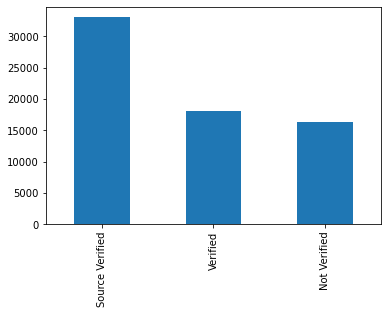

In [71]:
train['verification status'].value_counts().plot(kind='bar')
train['verification status'].value_counts(normalize = True)*100

INDIVIDUAL    99.817678
JOINT          0.182322
Name: application type, dtype: float64

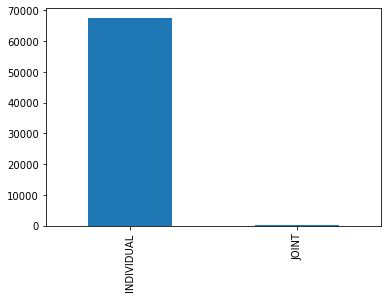

In [70]:
train['application type'].value_counts().plot(kind='bar')
train['application type'].value_counts(normalize = True)*100

n    1.0
Name: payment plan, dtype: float64

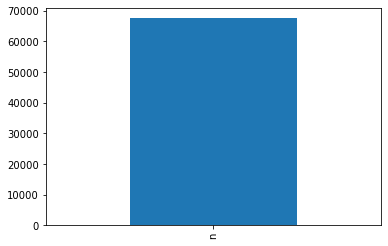

In [60]:
train['payment plan'].value_counts().plot(kind='bar')
train['payment plan'].value_counts(normalize = True)

Payment Plan should be dropped as the variance is zero

MORTGAGE    53.882869
RENT        35.797400
OWN         10.319731
Name: employment duration, dtype: float64

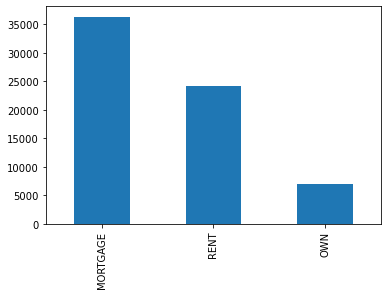

In [69]:
train['employment duration'].value_counts().plot(kind='bar')
train['employment duration'].value_counts(normalize = True)*100

BAT3873588    5.374798
BAT1586599    4.657368
BAT1104812    4.440953
BAT2252229    3.790226
BAT2803411    3.594563
BAT1780517    3.561952
BAT1184694    3.406312
BAT2078974    3.394453
BAT2575549    3.345538
BAT4694572    3.332197
BAT4271519    3.044632
BAT2558388    2.909743
BAT3193689    2.762996
BAT1930365    2.733350
BAT2136391    2.653306
BAT2333412    2.631072
BAT3726927    2.629590
BAT4136152    2.617731
BAT5341619    2.545099
BAT5525466    2.533240
BAT5489674    2.485807
BAT5629144    2.429480
BAT1766061    2.165632
BAT2833642    2.106340
BAT5924421    2.081141
BAT2522922    2.073729
BAT2428731    2.072247
BAT4808022    1.931429
BAT4351734    1.689815
BAT5547201    1.670545
BAT5714674    1.637935
BAT3461431    1.583090
BAT224923     1.326653
BAT1761981    1.325171
BAT4722912    1.314795
BAT2003848    1.248092
BAT1467036    1.188800
BAT5849876    1.138402
BAT3865626    1.079110
BAT5811547    1.053911
BAT1135695    0.438759
Name: batch enrolled, dtype: float64

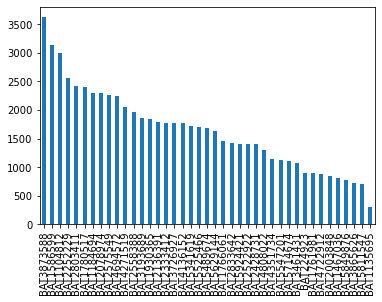

In [73]:
train['batch enrolled'].value_counts().plot(kind='bar')
train['batch enrolled'].value_counts(normalize = True)*100

#### Check the Relationship of Categorical Variables on Target Variable

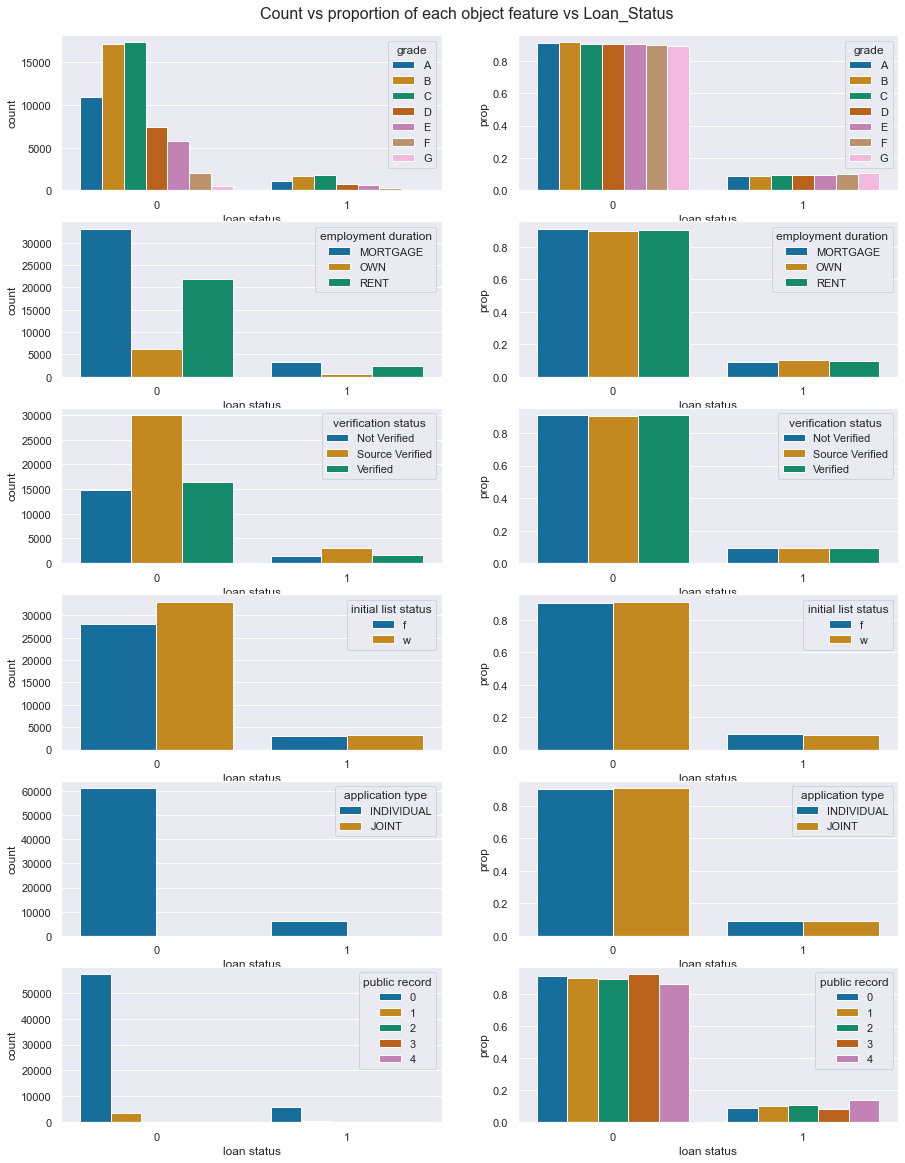

In [178]:
column_names = ['grade','employment duration','verification status','initial list status','application type','public record','loan status']
df1 = train[column_names]
def prop_check(data):
    f, axes = plt.subplots(6,2,figsize= (15,20))
    plt.suptitle('Count vs proportion of each object feature vs Loan_Status', size =16, y = 0.9)
    r = 0
    for i in column_names[:-1]:       
        data_prop = (data['loan status']
                          .groupby(data[i])
                          .value_counts(normalize = True)
                          .rename('prop')
                          .reset_index())
        sns.countplot(data = data, 
                          x ='loan status', 
                          hue = i, 
                          ax = axes[r,0], 
                          hue_order=data_prop[i].unique(), 
                          palette=current_palette)
        sns.barplot(data = data_prop, 
                        x = 'loan status', 
                        y = 'prop',
                        hue = i,
                        ax = axes[r,1],
                        palette=current_palette)
        r = r+1
prop_check(df1)

A visual inspection suggests that Categorical Variables might not be significant in predicting a Loan Outcome

In [174]:
import hvplot.pandas

def plot_histogram(df,bins,chartType="hist"):
    fig=plt.figure()
    for i in df.columns[:-1]:
        if list(df.columns[:-1]).index(i)==0:
            res = df.hvplot.hist(
            y=i, by='loan status',bins=bins, alpha=0.3, width=350, height=400,
            title="Loan Status by "+i, xlabel= i, ylabel='Loans Counts', 
            legend='top')
            
            box = df.hvplot.box(
            y=i, by='loan status', width=350, height=400, subplots = True,
            title="Loan Status by "+i, xlabel= i, ylabel='Loans Counts', 
            legend='top')
        else:
            res += df.hvplot.hist(
            y=i, by='loan status',bins=bins, alpha=0.3, width=350, height=400,
            title="Loan Status by "+i , xlabel=i, ylabel='Loans Counts', 
            legend='top')
            
            box += df.hvplot.box(
            y=i, by='loan status', width=350, height=400, subplots = True,
            title="Loan Status by "+i, xlabel= i, ylabel='Loans Counts', 
            legend='top')
        fig.tight_layout()
    if chartType=="hist":
        return res
    return box

In [168]:
amount = train[['loan amount','funded amount','funded amount investor','loan status']]

In [167]:
plot_histogram(amount,40)

:Layout
   .NdOverlay.I   :NdOverlay   [loan status]
      :Histogram   [loan amount]   (loan amount_count)
   .NdOverlay.II  :NdOverlay   [loan status]
      :Histogram   [funded amount]   (funded amount_count)
   .NdOverlay.III :NdOverlay   [loan status]
      :Histogram   [funded amount investor]   (funded amount investor_count)

<Figure size 1440x576 with 0 Axes>

In [175]:
plot_histogram(amount,40,"box")

:Layout
   .BoxWhisker.I   :BoxWhisker   [loan status]   (loan amount)
   .BoxWhisker.II  :BoxWhisker   [loan status]   (funded amount)
   .BoxWhisker.III :BoxWhisker   [loan status]   (funded amount investor)

<Figure size 1440x576 with 0 Axes>

In [181]:
interest = train[['interest rate','debit to income','total received interest','total received late fee','last week pay','loan status']]
plot_histogram(interest,40)

:Layout
   .NdOverlay.I   :NdOverlay   [loan status]
      :Histogram   [interest rate]   (interest rate_count)
   .NdOverlay.II  :NdOverlay   [loan status]
      :Histogram   [debit to income]   (debit to income_count)
   .NdOverlay.III :NdOverlay   [loan status]
      :Histogram   [total received interest]   (total received interest_count)
   .NdOverlay.IV  :NdOverlay   [loan status]
      :Histogram   [total received late fee]   (total received late fee_count)
   .NdOverlay.V   :NdOverlay   [loan status]
      :Histogram   [last week pay]   (last week pay_count)

<Figure size 1440x576 with 0 Axes>

In [182]:
plot_histogram(interest,40,"box")

:Layout
   .BoxWhisker.I   :BoxWhisker   [loan status]   (interest rate)
   .BoxWhisker.II  :BoxWhisker   [loan status]   (debit to income)
   .BoxWhisker.III :BoxWhisker   [loan status]   (total received interest)
   .BoxWhisker.IV  :BoxWhisker   [loan status]   (total received late fee)
   .BoxWhisker.V   :BoxWhisker   [loan status]   (last week pay)

<Figure size 1440x576 with 0 Axes>

In [201]:
late_fee = train[['total received late fee','loan status']]
plot_histogram(late_fee[late_fee["total received late fee"]<0.2],40)

:NdOverlay   [loan status]
   :Histogram   [total received late fee]   (total received late fee_count)

<Figure size 1440x576 with 0 Axes>

In [198]:
late_fee.loc[late_fee["total received late fee"]>0,'loan status'].value_counts()

0    61222
1     6241
Name: loan status, dtype: int64

In [199]:
late_fee.loc[late_fee["total received late fee"]>1,'loan status'].value_counts()

0    2952
1     349
Name: loan status, dtype: int64

In [202]:
late_fee.loc[late_fee["total received late fee"]<0.2,'loan status'].value_counts()

0    58263
1     5891
Name: loan status, dtype: int64

Bulk of the Late Fee payment is less than 0.2, This variable doesn't appear as a significant contributor to our model

In [204]:
delinq = train[['delinquency - two years', 'inquires - six months', 'open account','total accounts','accounts delinquent','loan status']]
plot_histogram(delinq,40)

:Layout
   .NdOverlay.I   :NdOverlay   [loan status]
      :Histogram   [delinquency - two years]   (delinquency - two years_count)
   .NdOverlay.II  :NdOverlay   [loan status]
      :Histogram   [inquires - six months]   (inquires - six months_count)
   .NdOverlay.III :NdOverlay   [loan status]
      :Histogram   [open account]   (open account_count)
   .NdOverlay.IV  :NdOverlay   [loan status]
      :Histogram   [total accounts]   (total accounts_count)
   .NdOverlay.V   :NdOverlay   [loan status]
      :Histogram   [accounts delinquent]   (accounts delinquent_count)

<Figure size 1440x576 with 0 Axes>

In [205]:
plot_histogram(delinq,40,"box")

:Layout
   .BoxWhisker.I   :BoxWhisker   [loan status]   (delinquency - two years)
   .BoxWhisker.II  :BoxWhisker   [loan status]   (inquires - six months)
   .BoxWhisker.III :BoxWhisker   [loan status]   (open account)
   .BoxWhisker.IV  :BoxWhisker   [loan status]   (total accounts)
   .BoxWhisker.V   :BoxWhisker   [loan status]   (accounts delinquent)

<Figure size 1440x576 with 0 Axes>

In [206]:
delinq.describe()

,delinquency - two years,inquires - six months,open account,total accounts,accounts delinquent,loan status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000
mean,0.327127,0.145754,14.266561,18.627929,0.0,0.092510
std,0.800888,0.473291,6.225060,8.319246,0.0,0.289747
min,0.000000,0.000000,2.000000,4.000000,0.0,0.000000
25%,0.000000,0.000000,10.000000,13.000000,0.0,0.000000
50%,0.000000,0.000000,13.000000,18.000000,0.0,0.000000
75%,0.000000,0.000000,16.000000,23.000000,0.0,0.000000
max,8.000000,5.000000,37.000000,72.000000,0.0,1.000000


Need to Delete Accounts Delinquent as its variance is 0

In [210]:
recoveries = train[['recoveries', 'collection recovery fee',
       'collection 12 months medical',
       'total collection amount',
       'loan status']]
plot_histogram(recoveries,40)

:Layout
   .NdOverlay.I   :NdOverlay   [loan status]
      :Histogram   [recoveries]   (recoveries_count)
   .NdOverlay.II  :NdOverlay   [loan status]
      :Histogram   [collection recovery fee]   (collection recovery fee_count)
   .NdOverlay.III :NdOverlay   [loan status]
      :Histogram   [collection 12 months medical]   (collection 12 months medical_count)
   .NdOverlay.IV  :NdOverlay   [loan status]
      :Histogram   [total collection amount]   (total collection amount_count)

<Figure size 1440x576 with 0 Axes>

In [211]:
plot_histogram(recoveries,40,"box")

:Layout
   .BoxWhisker.I   :BoxWhisker   [loan status]   (recoveries)
   .BoxWhisker.II  :BoxWhisker   [loan status]   (collection recovery fee)
   .BoxWhisker.III :BoxWhisker   [loan status]   (collection 12 months medical)
   .BoxWhisker.IV  :BoxWhisker   [loan status]   (total collection amount)

<Figure size 1440x576 with 0 Axes>

In [212]:
recoveries.describe()

,recoveries,collection recovery fee,collection 12 months medical,total collection amount,loan status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,59.691578,1.125141,0.021301,146.467990,0.092510
std,357.026346,3.489885,0.144385,744.382233,0.289747
min,0.000036,0.000036,0.000000,1.000000,0.000000
25%,1.629818,0.476259,0.000000,24.000000,0.000000
50%,3.344524,0.780141,0.000000,36.000000,0.000000
75%,5.453727,1.070566,0.000000,46.000000,0.000000
max,4354.467419,166.833000,1.000000,16421.000000,1.000000


In [215]:
recoveries.loc[recoveries["recoveries"]<=10,'loan status'].value_counts()

0    58821
1     5997
Name: loan status, dtype: int64

In [216]:
recovery = train[['recoveries','loan status']]
plot_histogram(recovery[recovery["recoveries"]<=10],40)

:NdOverlay   [loan status]
   :Histogram   [recoveries]   (recoveries_count)

<Figure size 1440x576 with 0 Axes>

In [217]:
recoveries.loc[recoveries["collection recovery fee"]<=2,'loan status'].value_counts()

0    60484
1     6170
Name: loan status, dtype: int64

In [227]:
recovery = train[['collection recovery fee','loan status']]
plot_histogram(recovery[recovery["collection recovery fee"]<=2],40)

:NdOverlay   [loan status]
   :Histogram   [collection recovery fee]   (collection recovery fee_count)

<Figure size 1440x576 with 0 Axes>

In [229]:
recoveries.loc[recoveries["collection 12 months medical"]==0,'loan status'].value_counts()

0    59916
1     6110
Name: loan status, dtype: int64

In [230]:
recoveries.loc[recoveries["collection 12 months medical"]==1,'loan status'].value_counts()

0    1306
1     131
Name: loan status, dtype: int64

Collection 12 months medical is mostly 0. Can remove it as well

In [234]:
recoveries.loc[recoveries["total collection amount"]<=80,'loan status'].value_counts()

0    56913
1     5760
Name: loan status, dtype: int64

In [236]:
recoveries.loc[recoveries["total collection amount"]>80,'loan status'].value_counts()

0    4309
1     481
Name: loan status, dtype: int64

In [235]:
recovery = train[['total collection amount','loan status']]
plot_histogram(recovery[recovery["total collection amount"]<=80],40)

:NdOverlay   [loan status]
   :Histogram   [total collection amount]   (total collection amount_count)

<Figure size 1440x576 with 0 Axes>

In [240]:
credit_limit = train[[ 'revolving balance', 'revolving utilities',
       'total current balance', 'total revolving credit limit', 'loan status']]
plot_histogram(credit_limit,40)

:Layout
   .NdOverlay.I   :NdOverlay   [loan status]
      :Histogram   [revolving balance]   (revolving balance_count)
   .NdOverlay.II  :NdOverlay   [loan status]
      :Histogram   [revolving utilities]   (revolving utilities_count)
   .NdOverlay.III :NdOverlay   [loan status]
      :Histogram   [total current balance]   (total current balance_count)
   .NdOverlay.IV  :NdOverlay   [loan status]
      :Histogram   [total revolving credit limit]   (total revolving credit limit_count)

<Figure size 1440x576 with 0 Axes>

In [241]:
plot_histogram(credit_limit,40,"box")

:Layout
   .BoxWhisker.I   :BoxWhisker   [loan status]   (revolving balance)
   .BoxWhisker.II  :BoxWhisker   [loan status]   (revolving utilities)
   .BoxWhisker.III :BoxWhisker   [loan status]   (total current balance)
   .BoxWhisker.IV  :BoxWhisker   [loan status]   (total revolving credit limit)

<Figure size 1440x576 with 0 Axes>

In [244]:
train.columns

Index(['id', 'loan amount', 'funded amount', 'funded amount investor', 'term',
       'batch enrolled', 'interest rate', 'grade', 'sub grade',
       'employment duration', 'home ownership', 'verification status',
       'payment plan', 'loan title', 'debit to income',
       'delinquency - two years', 'inquires - six months', 'open account',
       'public record', 'revolving balance', 'revolving utilities',
       'total accounts', 'initial list status', 'total received interest',
       'total received late fee', 'recoveries', 'collection recovery fee',
       'collection 12 months medical', 'application type', 'last week pay',
       'accounts delinquent', 'total collection amount',
       'total current balance', 'total revolving credit limit', 'loan status'],
      dtype='object')

In [315]:
sub1 = train.groupby("sub grade")["loan status"].apply(lambda x: x[x == 1].count()).reset_index()
sub1.rename({'loan status': 'default_count'}, axis=1, inplace=True)
sub0 = train.groupby("sub grade")["loan status"].apply(lambda x: x[x == 0].count()).reset_index()
sub0.rename({'loan status': 'no_default_count'}, axis=1, inplace=True)

In [316]:
sub0 = sub0.join(sub1["default_count"])
sub0["perc_default"] = sub0["default_count"]/sub0["no_default_count"]
sub0.rename({'sub grade': 'sub_grade'}, axis=1, inplace=True)

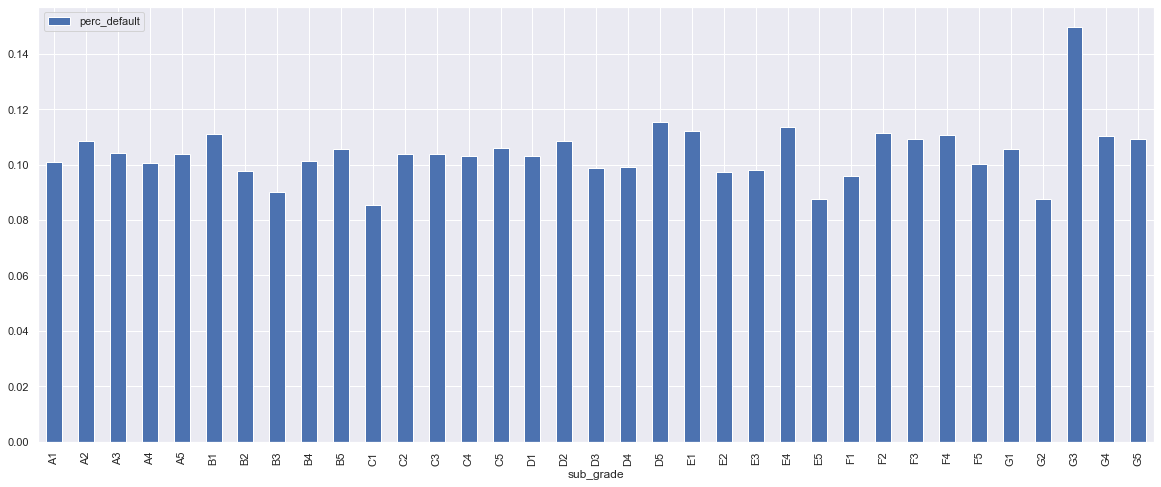

In [322]:
ax=sub0.plot.bar("sub_grade","perc_default")
#ax.set_xticklabels(sub0.sub_grade)

Based, on the Data, it would seem that sub_grade has no definite ordinal relationship wrt to Loan Status, So we would use CatBosster instead of Label Encoding

In [271]:
def displayLoanStatusBySplit(var):
    for term in train[var].unique():
        print(" Split by " + var + " " + str(term))
        print(train[train[var] == term]['loan status'].value_counts(normalize=True))
        print('==========================================')

In [272]:
displayLoanStatusBySplit('term')

 Split by term 59
0    0.902901
1    0.097099
Name: loan status, dtype: float64
 Split by term 36
0    0.894303
1    0.105697
Name: loan status, dtype: float64
 Split by term 58
0    0.917394
1    0.082606
Name: loan status, dtype: float64


Not much influence of term on loan status, as all 3 term labels show same distribution

In [273]:
displayLoanStatusBySplit('loan title')

 Split by loan title Debt Consolidation
0    0.918172
1    0.081828
Name: loan status, dtype: float64
 Split by loan title Debt consolidation
0    0.909464
1    0.090536
Name: loan status, dtype: float64
 Split by loan title Credit card refinancing
0    0.906014
1    0.093986
Name: loan status, dtype: float64
 Split by loan title Home improvement
0    0.904568
1    0.095432
Name: loan status, dtype: float64
 Split by loan title Credit Consolidation
0    0.88
1    0.12
Name: loan status, dtype: float64
 Split by loan title Green loan
0    0.911111
1    0.088889
Name: loan status, dtype: float64
 Split by loan title Other
0    0.90998
1    0.09002
Name: loan status, dtype: float64
 Split by loan title Moving and relocation
0    0.898089
1    0.101911
Name: loan status, dtype: float64
 Split by loan title Credit Cards
0    0.90625
1    0.09375
Name: loan status, dtype: float64
 Split by loan title Medical expenses
0    0.924051
1    0.075949
Name: loan status, dtype: float64
 Split by loa

In [251]:
displayLoanStatusBySplit('batch enrolled')

 term of the loan BAT2522922
0    0.904932
1    0.095068
Name: loan status, dtype: float64
 term of the loan BAT1586599
0    0.894971
1    0.105029
Name: loan status, dtype: float64
 term of the loan BAT2136391
0    0.907821
1    0.092179
Name: loan status, dtype: float64
 term of the loan BAT2428731
0    0.907725
1    0.092275
Name: loan status, dtype: float64
 term of the loan BAT5341619
0    0.912056
1    0.087944
Name: loan status, dtype: float64
 term of the loan BAT4694572
0    0.903915
1    0.096085
Name: loan status, dtype: float64
 term of the loan BAT4808022
0    0.90023
1    0.09977
Name: loan status, dtype: float64
 term of the loan BAT2558388
0    0.904228
1    0.095772
Name: loan status, dtype: float64
 term of the loan BAT2078974
0    0.908734
1    0.091266
Name: loan status, dtype: float64
 term of the loan BAT2252229
0    0.906922
1    0.093078
Name: loan status, dtype: float64
 term of the loan BAT2333412
0    0.914366
1    0.085634
Name: loan status, dtype: float64
 

In [252]:
displayLoanStatusBySplit('sub grade')

 term of the loan C4
0    0.906462
1    0.093538
Name: loan status, dtype: float64
 term of the loan D3
0    0.910088
1    0.089912
Name: loan status, dtype: float64
 term of the loan D4
0    0.909756
1    0.090244
Name: loan status, dtype: float64
 term of the loan C3
0    0.905799
1    0.094201
Name: loan status, dtype: float64
 term of the loan G5
0    0.901408
1    0.098592
Name: loan status, dtype: float64
 term of the loan C5
0    0.904126
1    0.095874
Name: loan status, dtype: float64
 term of the loan A5
0    0.905932
1    0.094068
Name: loan status, dtype: float64
 term of the loan C2
0    0.905871
1    0.094129
Name: loan status, dtype: float64
 term of the loan B5
0    0.904343
1    0.095657
Name: loan status, dtype: float64
 term of the loan B1
0    0.900137
1    0.099863
Name: loan status, dtype: float64
 term of the loan B4
0    0.908113
1    0.091887
Name: loan status, dtype: float64
 term of the loan A4
0    0.908569
1    0.091431
Name: loan status, dtype: float64
 ter

In [254]:
plot_histogram(train[['home ownership','loan status']],40)

:NdOverlay   [loan status]
   :Histogram   [home ownership]   (home ownership_count)

<Figure size 1440x576 with 0 Axes>

In [264]:
numericCols = [col for col in train.columns if train[col].dtype != "object"]

In [266]:
numericCols.remove('id')

<AxesSubplot:>

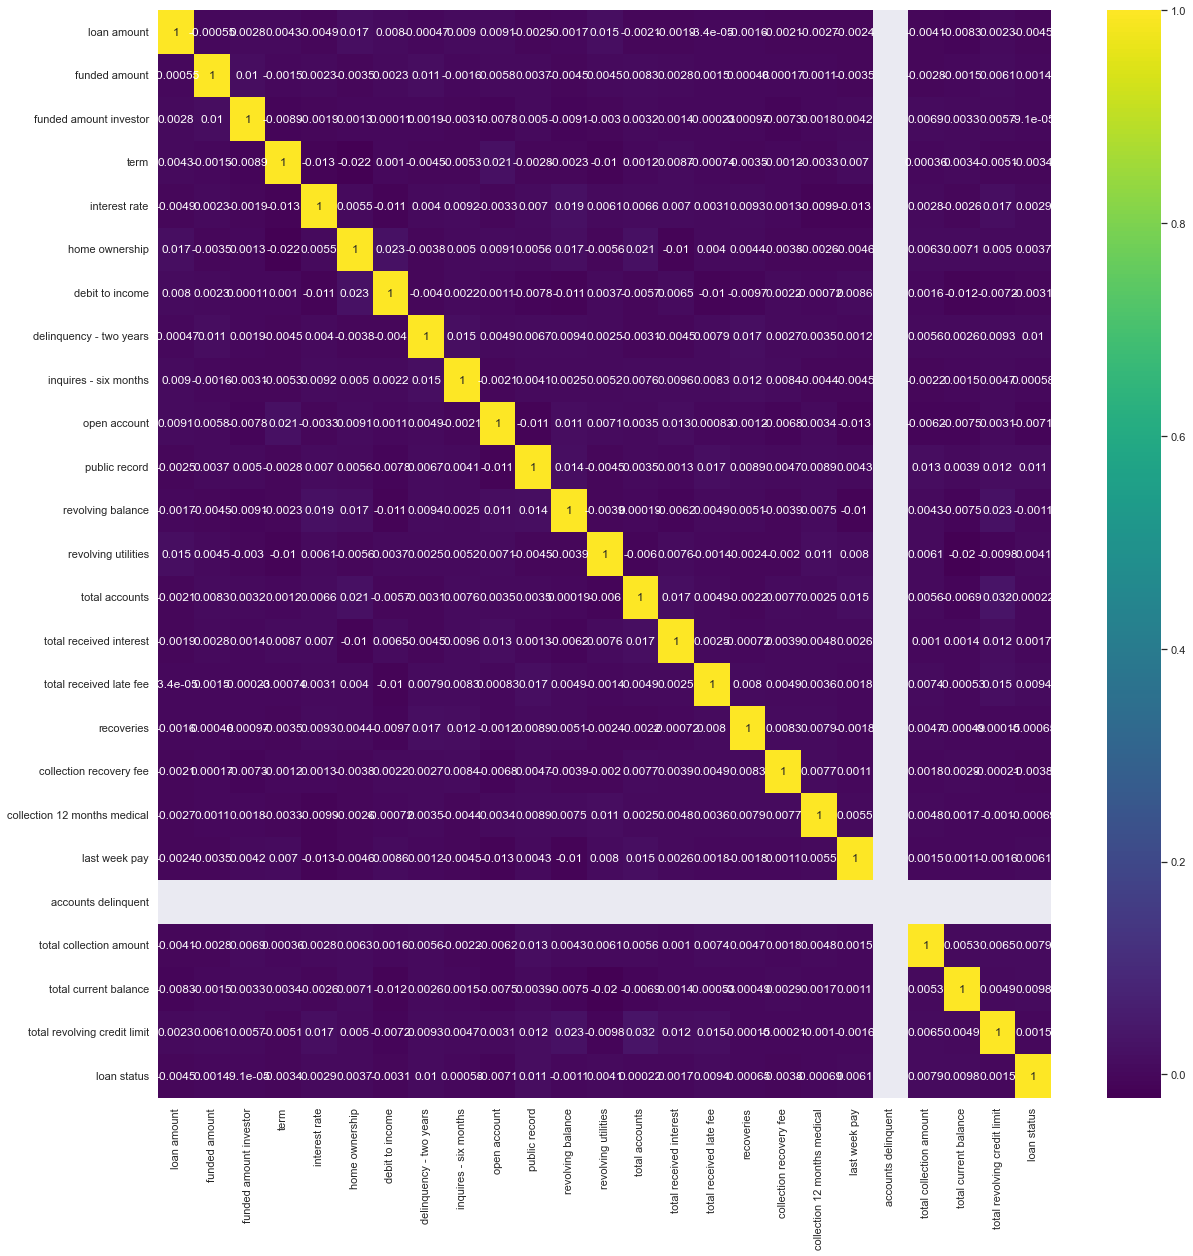

In [269]:
plt.figure(figsize=(20, 20))

sns.heatmap(train[numericCols].corr(), annot=True, cmap='viridis')

No Correlation ! Wow